# Setup and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 30)

In [54]:
# https://www.kaggle.com/datasets/kabhishm/global-spotify-weekly-chart?resource=download
df = pd.read_csv("spotify_weekly_chart.csv")

# Data Inspection

In [3]:
# check out first 10 rows
df.head(10)

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
0,1,=,SZA,Kill Bill,5,1,(x2),47288509,5814143.0,208044297
1,2,+3,Metro Boomin,Creepin',6,2,(x1),30753658,2661426.0,184223144
2,3,-1,Sam Smith,Unholy,16,1,(x7),30733283,-2398892.0,673533882
3,4,-1,Harry Styles,As It Was,41,1,(x11),28522200,-2475884.0,1747957886
4,5,-1,David Guetta,I'm Good (Blue),20,2,(x4),27260313,-3443943.0,568898155
5,6,=,Manuel Turizo,La Bachata,28,4,NaN,25879286,-1477809.0,693820743
6,7,=,Taylor Swift,Anti,12,1,(x3),24839659,-607201.0,458799904
7,8,+1,Arcángel,La Jumpa,6,8,NaN,24149297,249994.0,147015494
8,9,-1,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",27,1,(x9),21956111,-2494755.0,915813564
9,10,+1,Stephen Sanchez,Until I Found You,6,10,NaN,21822777,1666570.0,103784452


In [4]:
# get dimensions
df.shape

(200, 10)

In [5]:
# number of entries
df.size

2000

In [53]:
# summarize values
df.describe()

,Wks,Pk,(x?),Streams,Streams+,Total
count,200.000000,200.000000,200.000000,2.000000e+02,1.820000e+02,2.000000e+02
mean,46.915000,40.395000,0.780000,1.109910e+07,1.495678e+05,4.958258e+08
std,62.280108,43.894792,2.321323,5.553110e+06,1.418367e+06,6.056621e+08
min,1.000000,1.000000,0.000000,6.713045e+06,-3.443943e+06,6.713237e+06
25%,9.750000,6.000000,0.000000,7.720350e+06,-3.882400e+05,1.034072e+08
50%,24.000000,23.000000,0.000000,8.816404e+06,1.653155e+05,2.658862e+08
75%,59.250000,64.000000,0.000000,1.335638e+07,5.566680e+05,6.465569e+08
max,310.000000,199.000000,14.000000,4.728851e+07,7.621342e+06,3.291327e+09


In [55]:
# concise summary - index dtype and columns, non-null values, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pos       200 non-null    int64  
 1   P+        200 non-null    object 
 2   Artist    200 non-null    object 
 3   Title     200 non-null    object 
 4   Wks       200 non-null    int64  
 5   Pk        200 non-null    int64  
 6   (x?)      36 non-null     object 
 7   Streams   200 non-null    int64  
 8   Streams+  182 non-null    float64
 9   Total     200 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 15.8+ KB


In [58]:
# check for any missing values
df.isna().sum()

Pos           0
P+            0
Artist        0
Title         0
Wks           0
Pk            0
(x?)        164
Streams       0
Streams+     18
Total         0
dtype: int64

In [9]:
# fill in missing values with something sensible
df['(x?)'] = df['(x?)'].fillna('(x0)')

In [10]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=200, step=1)
Index(['Pos', 'P+', 'Artist', 'Title', 'Wks', 'Pk', '(x?)', 'Streams',
       'Streams+', 'Total'],
      dtype='object')


# Common Functions

## Indexing

In [11]:
df.head()

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
0,1,=,SZA,Kill Bill,5,1,(x2),47288509,5814143.0,208044297
1,2,+3,Metro Boomin,Creepin',6,2,(x1),30753658,2661426.0,184223144
2,3,-1,Sam Smith,Unholy,16,1,(x7),30733283,-2398892.0,673533882
3,4,-1,Harry Styles,As It Was,41,1,(x11),28522200,-2475884.0,1747957886
4,5,-1,David Guetta,I'm Good (Blue),20,2,(x4),27260313,-3443943.0,568898155


In [12]:
df = df.set_index('Pos')

In [13]:
df.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
      dtype='int64', name='Pos', length=200)

In [14]:
df.head()

,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
Pos,,,,,,,,,
1,=,SZA,Kill Bill,5,1,(x2),47288509,5814143.0,208044297
2,+3,Metro Boomin,Creepin',6,2,(x1),30753658,2661426.0,184223144
3,-1,Sam Smith,Unholy,16,1,(x7),30733283,-2398892.0,673533882
4,-1,Harry Styles,As It Was,41,1,(x11),28522200,-2475884.0,1747957886
5,-1,David Guetta,I'm Good (Blue),20,2,(x4),27260313,-3443943.0,568898155


## Element Access

In [59]:
# get a specific column, output is a series
df["Title"]

0                                              Kill Bill
1                                               Creepin'
2                                                 Unholy
3                                              As It Was
4                                        I'm Good (Blue)
5                                             La Bachata
6                                                   Anti
7                                               La Jumpa
8                  Quevedo: Bzrp Music Sessions, Vol. 52
9                                      Until I Found You
10                                                 Ditto
11                                             Escapism.
12                                             Calm Down
13                                           golden hour
14                                          Another Love
15                                             Rich Flex
16                                       I Ain't Worried
17                             

In [60]:
# get several specific columns, output is a df
df[['Artist', 'Title', 'Streams']]

# df['Artist', 'Title']          # this is an error, tries to find a column named with the tuple ('Artist', 'Title')

,Artist,Title,Streams
0,SZA,Kill Bill,47288509
1,Metro Boomin,Creepin',30753658
2,Sam Smith,Unholy,30733283
3,Harry Styles,As It Was,28522200
4,David Guetta,I'm Good (Blue),27260313
5,Manuel Turizo,La Bachata,25879286
6,Taylor Swift,Anti,24839659
7,Arcángel,La Jumpa,24149297
8,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",21956111
9,Stephen Sanchez,Until I Found You,21822777


In [61]:
# find all songs that peaked in the top 3
df[df['Pk'] <= 3]

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
0,1,=,SZA,Kill Bill,5,1,(x2),47288509,5814143.0,208044297
1,2,+3,Metro Boomin,Creepin',6,2,(x1),30753658,2661426.0,184223144
2,3,-1,Sam Smith,Unholy,16,1,(x7),30733283,-2398892.0,673533882
3,4,-1,Harry Styles,As It Was,41,1,(x11),28522200,-2475884.0,1747957886
4,5,-1,David Guetta,I'm Good (Blue),20,2,(x4),27260313,-3443943.0,568898155
6,7,=,Taylor Swift,Anti,12,1,(x3),24839659,-607201.0,458799904
8,9,-1,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",27,1,(x9),21956111,-2494755.0,915813564
15,16,-2,Drake,Rich Flex,10,2,(x1),19354054,-431589.0,265183146
22,23,-13,Bad Bunny,Me Porto Bonito,36,2,(x1),18132776,-2452416.0,1081103183
44,45,-9,Glass Animals,Heat Waves,107,1,(x10),13749412,-1320155.0,2109785409


In [62]:
# access values by index and column label
df.loc[150, 'Title']

'Blank Space'

In [63]:
new_df = df.copy()
new_df = new_df.set_index('Title')
new_df.head()

,Pos,P+,Artist,Wks,Pk,(x?),Streams,Streams+,Total
Title,,,,,,,,,
Kill Bill,1,=,SZA,5,1,(x2),47288509,5814143.0,208044297
Creepin',2,+3,Metro Boomin,6,2,(x1),30753658,2661426.0,184223144
Unholy,3,-1,Sam Smith,16,1,(x7),30733283,-2398892.0,673533882
As It Was,4,-1,Harry Styles,41,1,(x11),28522200,-2475884.0,1747957886
I'm Good (Blue),5,-1,David Guetta,20,2,(x4),27260313,-3443943.0,568898155


In [64]:
new_df.loc['Kill Bill']

Pos                 1
P+                  =
Artist           SZA 
Wks                 5
Pk                  1
(x?)             (x2)
Streams      47288509
Streams+    5814143.0
Total       208044297
Name: Kill Bill, dtype: object

In [65]:
new_df.index

Index(['Kill Bill', 'Creepin'', 'Unholy', 'As It Was', 'I'm Good (Blue)',
       'La Bachata', 'Anti', 'La Jumpa',
       'Quevedo: Bzrp Music Sessions, Vol. 52', 'Until I Found You',
       ...
       'Te Felicito', 'My Universe', 'You're On Your Own, Kid',
       'Don’t Blame Me', 'Everybody Wants To Rule The World', 'Boy's a liar',
       'Kesariya', 'Take Me To Church', 'Agudo Mágico 3', 'Payphone'],
      dtype='object', name='Title', length=200)

In [66]:
# access entire data row by index
df.loc[150]

Pos                   151
P+                     +5
Artist      Taylor Swift 
Title         Blank Space
Wks                    57
Pk                    113
(x?)                  NaN
Streams           7717694
Streams+         298960.0
Total           365755826
Name: 150, dtype: object

In [67]:
# access entire column by column label
df.loc[:, 'Title']

0                                              Kill Bill
1                                               Creepin'
2                                                 Unholy
3                                              As It Was
4                                        I'm Good (Blue)
5                                             La Bachata
6                                                   Anti
7                                               La Jumpa
8                  Quevedo: Bzrp Music Sessions, Vol. 52
9                                      Until I Found You
10                                                 Ditto
11                                             Escapism.
12                                             Calm Down
13                                           golden hour
14                                          Another Love
15                                             Rich Flex
16                                       I Ain't Worried
17                             

In [68]:
# Do the same things but just by row number and column number
df.iloc[100, 2]

'Jung Kook '

# Sorting and value counts

In [69]:
# sort rows by the most number of weeks on the charts, ties broken by peak
df.sort_values(by=["Wks", "Pk"], axis=0, ascending=False)

,Pos,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
127,128,-10,Imagine Dragons,Believer,310,16,NaN,8214435,-4840.0,2323864824
101,102,+10,Ed Sheeran,Perfect,304,4,NaN,8805076,316633.0,2245579816
184,185,-9,Ed Sheeran,Shape of You,299,1,(x14),6911228,-188479.0,3234670723
172,173,RE,James Arthur,Say You Won't Let Go,283,7,NaN,7195612,NaN,1928060377
74,75,+17,Billie Eilish,lovely,247,24,NaN,9864315,938461.0,2029742349
165,166,+12,OneRepublic,Counting Stars,242,3,(x5),7381621,303657.0,979714976
115,116,+28,Vance Joy,Riptide,231,16,NaN,8552102,818904.0,943615125
183,184,+11,Post Malone,Sunflower,216,1,(x2),7010924,209189.0,2432366466
97,98,+40,Lewis Capaldi,Someone You Loved,209,4,NaN,8843090,1066231.0,2536275696
168,169,+15,Eminem,Lose Yourself,208,44,NaN,7307231,374502.0,710991863


In [71]:
# count how many times each value appears for a column

df['Artist'].value_counts()

Artist
The Weeknd                  9
SZA                         7
Bad Bunny                   7
Taylor Swift                6
Eminem                      5
Imagine Dragons             4
Ed Sheeran                  4
Metro Boomin                4
Arctic Monkeys              4
Quevedo                     3
Harry Styles                3
Coldplay                    3
NewJeans                    3
Feid                        3
Joji                        2
Rauw Alejandro              2
KAROL G                     2
Shakira                     2
Billie Eilish               2
BLACKPINK                   2
Lil Nas X                   2
Post Malone                 2
Bruno Mars                  2
Dua Lipa                    2
Steve Lacy                  2
Hotel Ugly                  2
Bizarrap                    2
Rema                        2
RAYE                        2
Stephen Sanchez             2
Sam Smith                   2
Drake                       2
d4vd                        2
One

## Aggregations

Don't compute these statistics "manually" using for loops.
The library functions are vectorized and will run faster.

In [72]:
df['Streams'].mean()

11099104.19

In [73]:
df['Streams'].median()

8816404.0

In [74]:
df['Streams'].max()

47288509

In [75]:
# standard deviation
df['Streams'].std()

5553109.705064236

# Examples


Task: Find the artists with most appearances on the list and sort the dataset in decreasing order of number of appearances

In [32]:
most_app_idx = df['Artist'].value_counts().index

print(most_app_idx)

Index(['The Weeknd ', 'SZA ', 'Bad Bunny ', 'Taylor Swift ', 'Eminem ',
       'Imagine Dragons ', 'Ed Sheeran ', 'Metro Boomin ', 'Arctic Monkeys ',
       'Quevedo ',
       ...
       'Zach Bryan ', 'Arijit Singh ', 'Rihanna ', 'Kordhell ',
       'Charlie Puth ', 'Cris Mj ', 'JVKE ', 'Tom Odell ', 'Grupo Frontera ',
       'Maroon 5 '],
      dtype='object', name='Artist', length=128)


In [33]:
df.reset_index().set_index('Artist').loc['The Weeknd ']

,Pos,P+,Title,Wks,Pk,(x?),Streams,Streams+,Total
Artist,,,,,,,,,
The Weeknd,19,+4,Die For You,52,19,(x0),18785838,1175379.0,540570233
The Weeknd,49,+1,Starboy,133,1,(x6),13540082,818994.0,1353585964
The Weeknd,52,-10,Blinding Lights,163,1,(x13),12719479,-1359801.0,3291327093
The Weeknd,63,-1,I Was Never There,32,17,(x0),10824856,598406.0,304723168
The Weeknd,79,+9,Call Out My Name,64,1,(x1),9500339,490761.0,602334730
The Weeknd,88,+2,Save Your Tears,110,2,(x4),9212348,209927.0,1227315734
The Weeknd,133,+14,The Hills,154,3,(x1),8049869,418766.0,936592580
The Weeknd,150,+18,Stargirl Interlude,27,42,(x0),7721235,531899.0,180583345
The Weeknd,167,-62,Save Your Tears (Remix),40,43,(x0),7368432,-1202841.0,305526375


In [34]:
df.reset_index().set_index('Artist').loc[most_app_idx]

# A.loc[array] -> [A.loc[array[0]], A.loc[array[1]] ,.., ]

,Pos,P+,Title,Wks,Pk,(x?),Streams,Streams+,Total
Artist,,,,,,,,,
The Weeknd,19,+4,Die For You,52,19,(x0),18785838,1175379.0,540570233
The Weeknd,49,+1,Starboy,133,1,(x6),13540082,818994.0,1353585964
The Weeknd,52,-10,Blinding Lights,163,1,(x13),12719479,-1359801.0,3291327093
The Weeknd,63,-1,I Was Never There,32,17,(x0),10824856,598406.0,304723168
The Weeknd,79,+9,Call Out My Name,64,1,(x1),9500339,490761.0,602334730
The Weeknd,88,+2,Save Your Tears,110,2,(x4),9212348,209927.0,1227315734
The Weeknd,133,+14,The Hills,154,3,(x1),8049869,418766.0,936592580
The Weeknd,150,+18,Stargirl Interlude,27,42,(x0),7721235,531899.0,180583345
The Weeknd,167,-62,Save Your Tears (Remix),40,43,(x0),7368432,-1202841.0,305526375


Task: Convert the (x?) column into integers

In [35]:
df.dtypes

P+           object
Artist       object
Title        object
Wks           int64
Pk            int64
(x?)         object
Streams       int64
Streams+    float64
Total         int64
dtype: object

In [36]:
df['(x?)'] = df['(x?)'].apply(lambda s : s[2:-1])


# (x13) -> 13

# def function(s):
#   return s[2:-1]

# lambda x : x+1
# def function(x):
#    return x+1

In [37]:
df['(x?)'] = df['(x?)'].astype('int64')

In [38]:
df.dtypes

P+           object
Artist       object
Title        object
Wks           int64
Pk            int64
(x?)          int64
Streams       int64
Streams+    float64
Total         int64
dtype: object

In [39]:
df.head()

,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
Pos,,,,,,,,,
1,=,SZA,Kill Bill,5,1,2,47288509,5814143.0,208044297
2,+3,Metro Boomin,Creepin',6,2,1,30753658,2661426.0,184223144
3,-1,Sam Smith,Unholy,16,1,7,30733283,-2398892.0,673533882
4,-1,Harry Styles,As It Was,41,1,11,28522200,-2475884.0,1747957886
5,-1,David Guetta,I'm Good (Blue),20,2,4,27260313,-3443943.0,568898155


# Visualization

Text(0, 0.5, 'Inverse of # Streams')

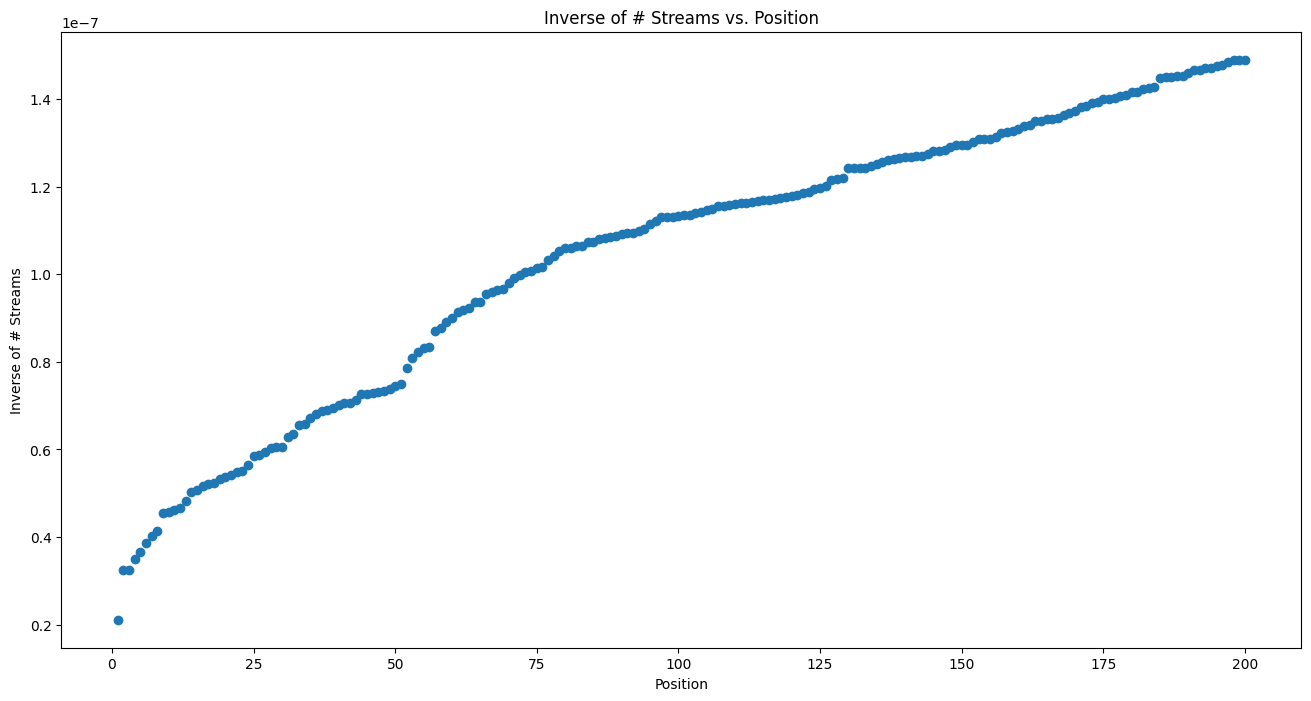

In [ ]:
plt.figure(figsize=(16,8))

plt.scatter(df.index, 1 / df['Streams'])
plt.title("Inverse of # Streams vs. Position")
plt.xlabel("Position")
plt.ylabel("Inverse of # Streams")

Text(0, 0.5, 'Count')

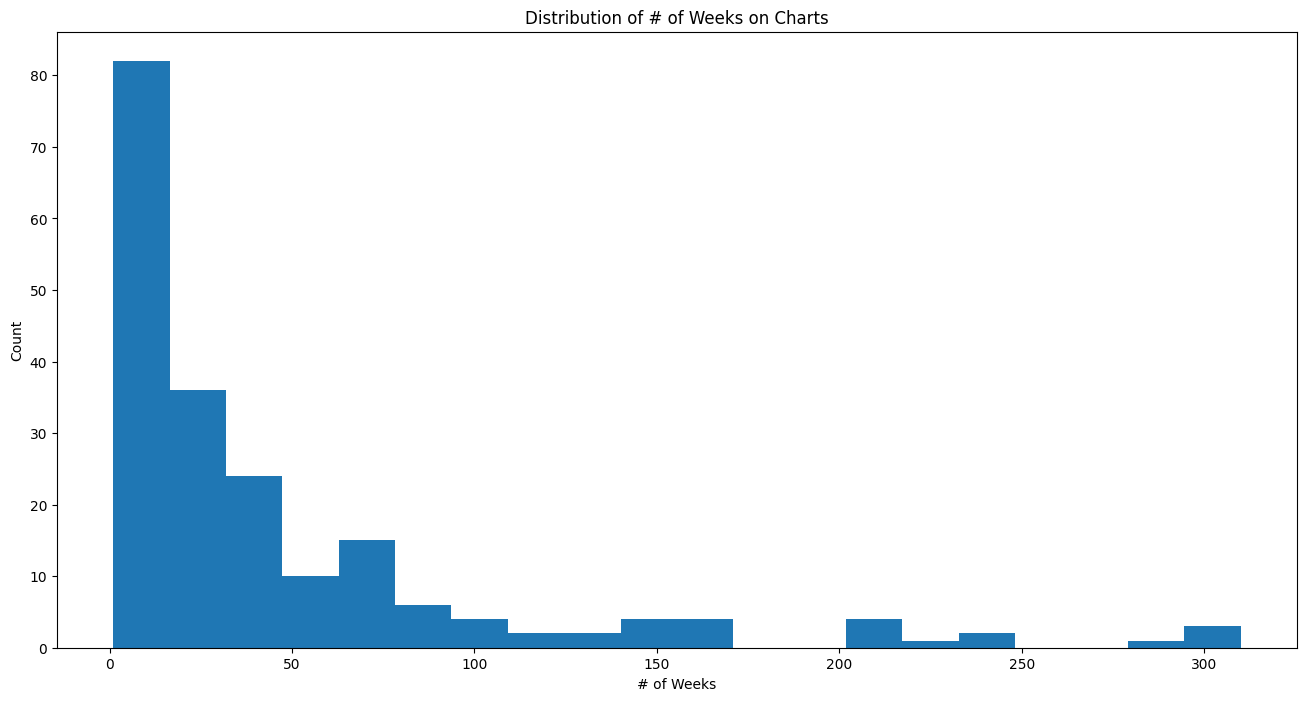

In [41]:
plt.figure(figsize=(16,8))

plt.hist(df["Wks"], bins=20)

plt.title("Distribution of # of Weeks on Charts")
plt.xlabel("# of Weeks")
plt.ylabel("Count")

In [42]:
# https://www.kaggle.com/datasets/achintyatripathi/yahoo-finance-apple-inc-aapl?select=AAPL_daily_update.csv
aapl_df = pd.read_csv("AAPL_daily_update.csv")

In [43]:
aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-10,53.465000,54.195000,52.927502,54.174999,53.642761,127111600
1,2019-09-11,54.517502,55.927502,54.432499,55.897499,55.348343,177158400
2,2019-09-12,56.200001,56.605000,55.715000,55.772499,55.224567,128906800
3,2019-09-13,55.000000,55.197498,54.255001,54.687500,54.150230,159053200
4,2019-09-16,54.432499,55.032501,54.389999,54.974998,54.434902,84632400


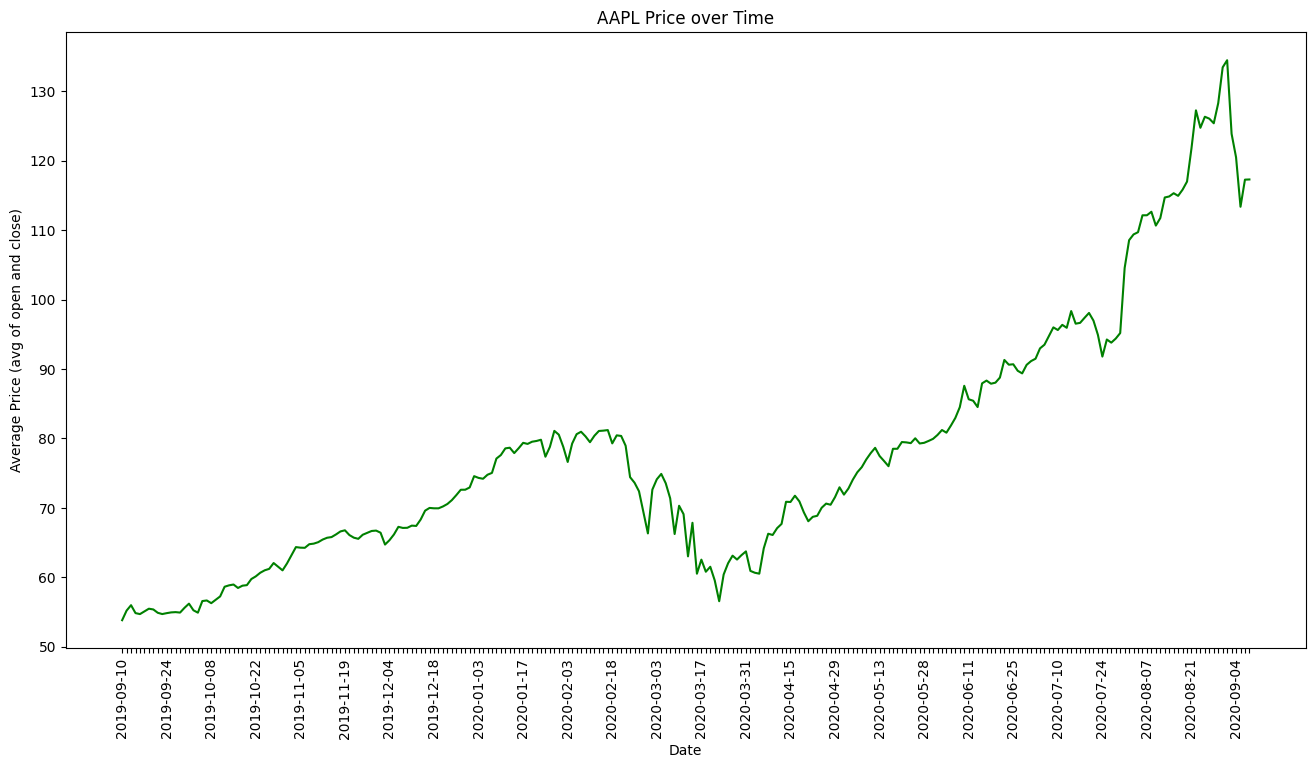

In [78]:
plt.figure(figsize=(16,8))

plt.plot(aapl_df.Date, (aapl_df.Open + aapl_df.Close) / 2, color="green", alpha=1)

plt.title("AAPL Price over Time")
plt.xlabel("Date")
plt.ylabel("Average Price (avg of open and close)")

# make x tick labels vertical
plt.xticks(rotation=90)

# don't show every date on x-axis
ax = plt.gca()

every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)



# Modeling

In [45]:
df.head()

,P+,Artist,Title,Wks,Pk,(x?),Streams,Streams+,Total
Pos,,,,,,,,,
1,=,SZA,Kill Bill,5,1,2,47288509,5814143.0,208044297
2,+3,Metro Boomin,Creepin',6,2,1,30753658,2661426.0,184223144
3,-1,Sam Smith,Unholy,16,1,7,30733283,-2398892.0,673533882
4,-1,Harry Styles,As It Was,41,1,11,28522200,-2475884.0,1747957886
5,-1,David Guetta,I'm Good (Blue),20,2,4,27260313,-3443943.0,568898155


Hypothesis: # Wks spent on charts is positively correlated to total streams

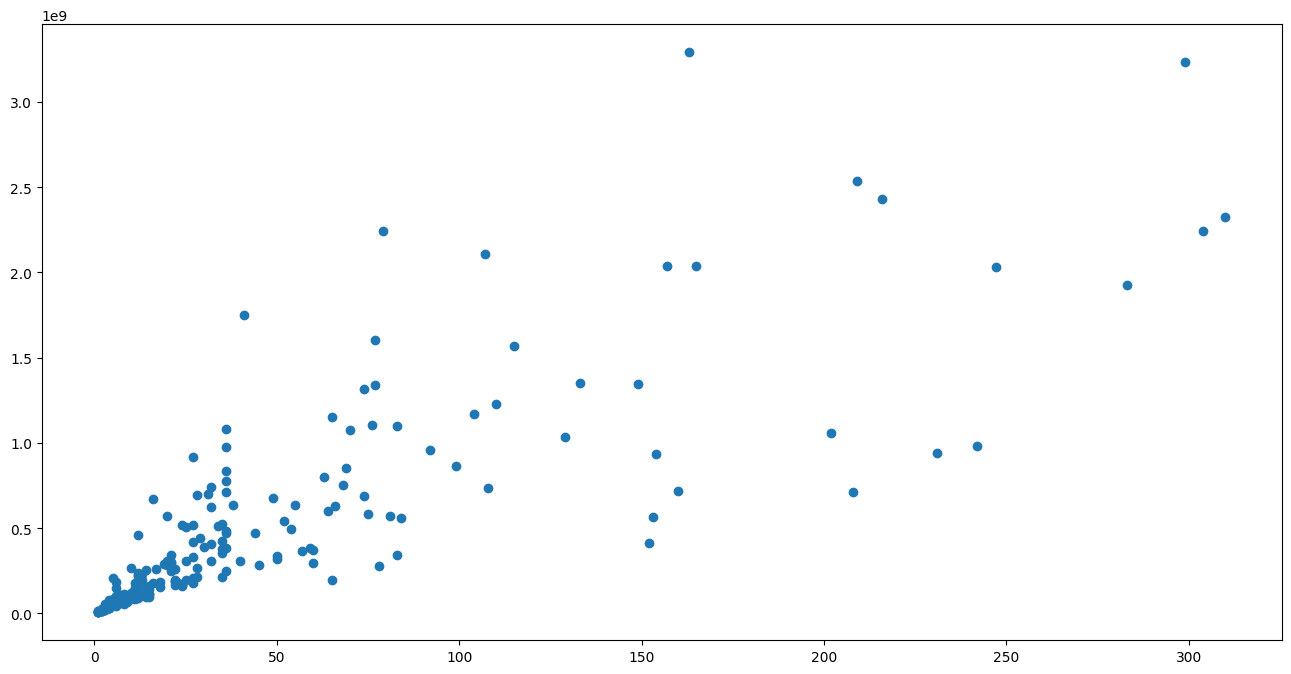

In [46]:
plt.figure(figsize=(16,8))

plt.scatter(df.Wks, df.Total)

# df["Wks"]
# df.Wks

In [47]:
print(df.Wks > 10)
regression_df = df[df.Wks > 10]

Pos
1      False
2      False
3       True
4       True
5       True
6       True
7       True
8      False
9       True
10     False
11     False
12     False
13      True
14      True
15      True
16     False
17      True
18      True
19      True
20      True
21     False
22      True
23      True
24      True
25     False
26      True
27     False
28      True
29      True
30     False
31      True
32      True
33     False
34      True
35      True
36      True
37      True
38     False
39     False
40     False
41      True
42      True
43     False
44      True
45      True
46      True
47     False
48      True
49      True
50      True
51      True
52      True
53      True
54     False
55     False
56      True
57      True
58     False
59      True
60     False
61      True
62      True
63      True
64      True
65     False
66      True
67     False
68      True
69      True
70     False
71     False
72     False
73      True
74      True
75      True
76      True
77      

In [48]:
regression_df.shape

(146, 9)

In [79]:
# sm.OLS(y, X)
X = sm.add_constant(regression_df.Wks)
model = sm.OLS(regression_df.Total, X)
result = model.fit()

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.92e-30
Time:                        15:24:25   Log-Likelihood:                -3099.8
No. Observations:                 146   AIC:                             6204.
Df Residuals:                     144   BIC:                             6210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.921e+08    4.6e+07      4.173      0.000    1.01e+08    2.83e+08
Wks         7.429e+06   5.06e+05     14.695      0.000    6.43e+06    8.43e+06
==============================================================================
Omnibus:                       48.506   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.434
Skew:                           1.227   Prob(JB):                     1.45e-35
Kurtosis:                       7.511   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Wks', ylabel='Total'>

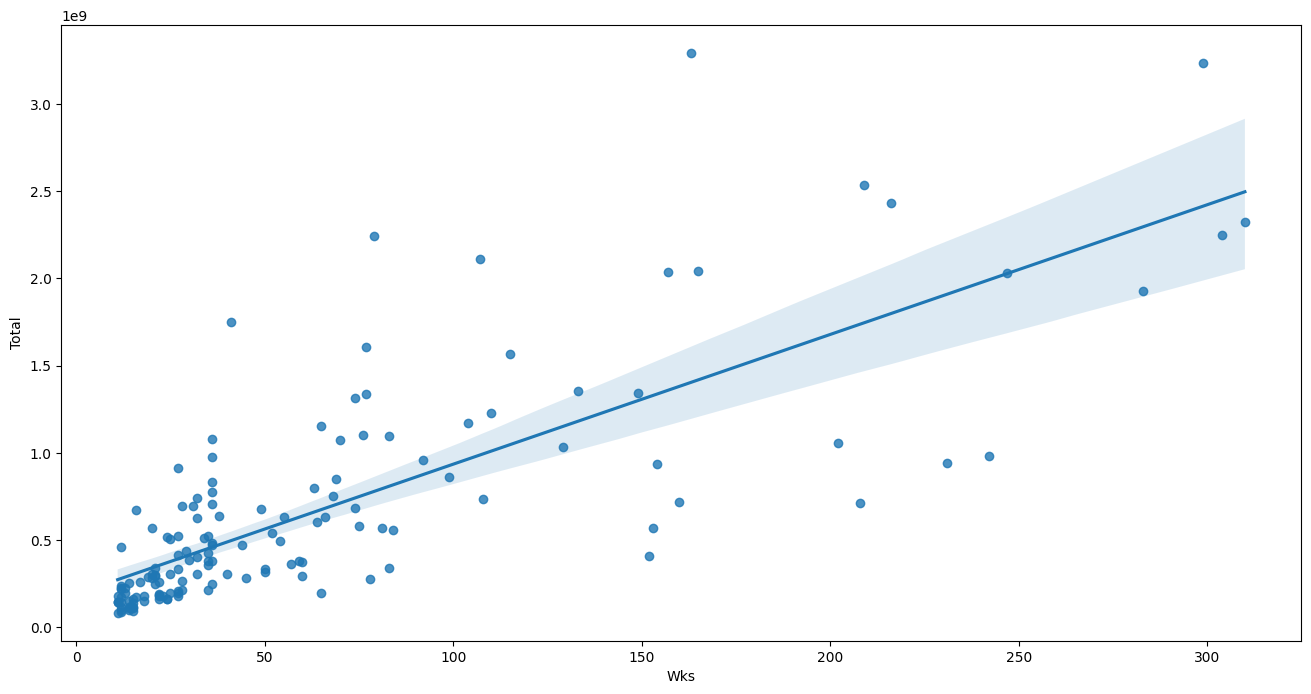

In [80]:
plt.figure(figsize=(16,8))

# unfortunately this has intercept, and no easy way to adjust this
sns.regplot(data=regression_df, x="Wks", y="Total", fit_reg=True)

# Exercises

In [81]:
# loading iris dataset
from sklearn import datasets

iris = datasets.load_iris()
print(iris["data"][0:10, :], iris["target"], iris["feature_names"])

targets = np.reshape(iris["target"], newshape=(len(iris["data"]), 1))
new_data = np.concatenate((iris["data"], targets), axis=1)
iris = pd.DataFrame(data=new_data, columns=iris["feature_names"] + ["target"])
print(iris)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4              

In [ ]:
# Exercise 1:
# Use some one line functions to answer these questions:
# How big is the dataset?
# What information is in the dataset?
# How do we extract columns from the dataset?
# Output the first few enries of the dataset. Print the last few entries of the dataset.


In [ ]:
# Exercise 2:
# Output 5 flowers with the largest sepal width (cm)

In [ ]:
# Exercise 3:
# Create a new column named sepal ratio: which is the ratio sepal width / sepal length
# Do the same for petal ratio

In [ ]:
# Exercise 4:
# Graph petal ratio vs sepal ratio

In [75]:
a = np.array([0,1,2,3,4,5]).reshape(6,1)
b = np.array([6,7,8,9,10,11]).reshape(1,6)
print(a)
print(b)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
[[ 6  7  8  9 10 11]]


In [78]:
c = a*b
print(c)

[[ 0  0  0  0  0  0]
 [ 6  7  8  9 10 11]
 [12 14 16 18 20 22]
 [18 21 24 27 30 33]
 [24 28 32 36 40 44]
 [30 35 40 45 50 55]]


In [79]:
a*b > 12

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])